
<img src = 'titanic2.jpg' style= 'width:100; height:500px'/>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # set seaborn as default plots
import sklearn
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# In Machine Learning, the data is mainly divided into two parts —
* Training and Testing (the third split is validation, but you don’t have to care about that right now). 
* Training data is for training our algorithm and Testing data is to check how well our algorithm performs

In [101]:
# importing the training data set and naming it data_1 and also making a copy of it
data_1 = pd.read_csv('TIT_train.csv')
data_2 = data_1.copy()
data_3 = data_1.copy()

# viewing some details of the train data set
* train data set info
* train data set columns
* checking if there are missing data  and fill the isnull data
* checking for strings and converting it to numeric data ( Data Engineering )

In [102]:
data_1.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22,38,26,35,35
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [103]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [104]:
data_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [105]:
data_1.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [106]:
# checking all the string data type
for label, columns in data_1.items():
    if pd.api.types.is_string_dtype(columns):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [107]:
# checking all the numeric data type
for label, columns in data_1.items():
    if pd.api.types.is_numeric_dtype(columns):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [108]:
# turn string data type into category
for label, columns in data_1.items():
    if pd.api.types.is_string_dtype(columns):
        data_1[label] = columns.astype('category').cat.as_ordered()

In [109]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


In [110]:
# checking all string data type that has null/missing value
for label, content in data_1.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isna(content).sum():
            print(label)

Cabin
Embarked


In [111]:
# Turn categorical variables into numbers and fill missing
for label, content in data_1.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        data_1[label] = pd.Categorical(content).codes+1

In [112]:
# checking all numeric datatype that has missing valus
for label, columns in data_1.items():
    if pd.api.types.is_numeric_dtype(columns):
        if pd.isna(columns).sum():
            print(label)

Age


In [113]:
# filling all missing numeric valuw
for label, content in data_1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data_1[label] = content.fillna(content.median())

In [114]:
data_1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data visualization
* Create a function to visualize the Variables in relation to the Target column
* Age in relation to Survived or not Survived
* Gender in relation to SUrvived or not Survived 

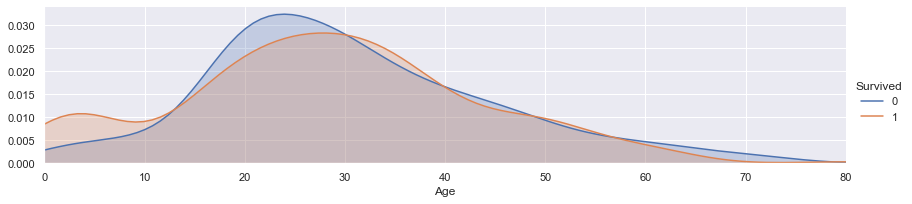

In [115]:
facet = sns.FacetGrid(data_2, hue ='Survived', aspect =4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim =(0, data_2['Age'].max()))
facet.add_legend()
plt.show()

In [116]:
def bar_chart(feature):
    survived = data_2[data_2['Survived'] ==1][feature].value_counts()
    dead = data_2[data_2['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind ='bar',stacked =True, figsize =(10,5))

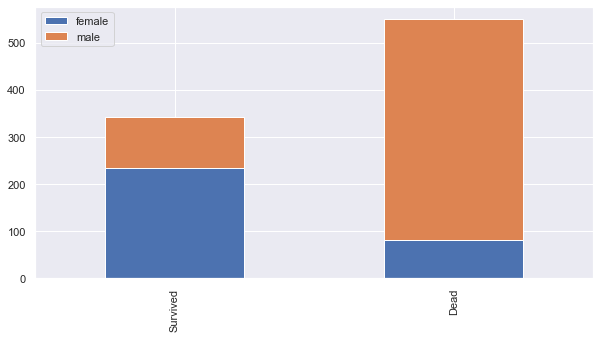

In [117]:
bar_chart('Sex')

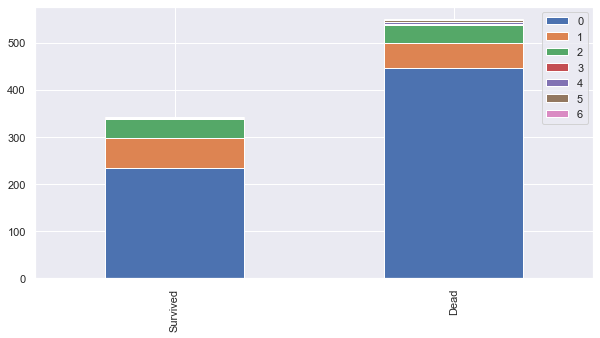

In [118]:
bar_chart('Parch')

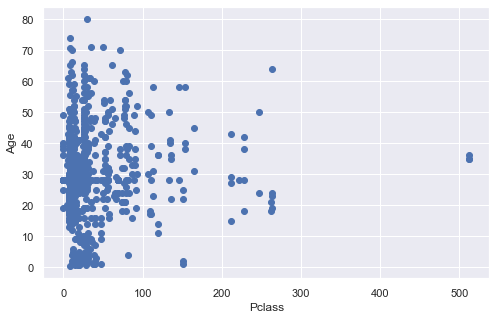

In [119]:
fig, ax= plt.subplots(figsize =(8,5))
ax.scatter(data_1.Fare, data_1.Age)
ax.set(xlabel ='Pclass', ylabel ='Age');

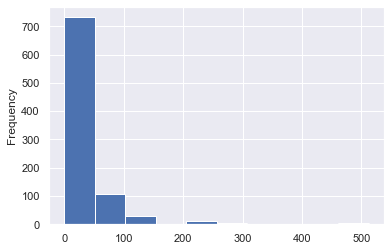

In [120]:
data_1.Fare.plot(kind ='hist');

In [121]:
data_1.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

# creating a model
* using RandomForestRegressor and XGBClassifier to create a model


In [122]:
x_train = data_1.drop('Survived',axis = 1)
y_train = data_1['Survived']
clf4 = RandomForestClassifier(n_jobs=-1, random_state =47)
clf4.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)

In [125]:
x_train = data_1.drop('Survived',axis = 1)
y_train = data_1['Survived']
clf5 = XGBClassifier(n_jobs=-1, random_state =47)
clf5.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=47,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [124]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    int16  
 3   Sex          891 non-null    int8   
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int16  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int16  
 10  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(4), int8(2)
memory usage: 48.9 KB


# Importing the Training Data set
* viewing the test data set
* feature engineering
* using the the test data set on the test set

In [126]:
# Importing the test data
df_test = pd.read_csv('TIT_test.csv')

In [127]:
df_test.head().T

,0,1,2,3,4
PassengerId,892,893,894,895,896
Pclass,3,3,2,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)"
Sex,male,female,male,male,female
Age,34.5,47,62,27,22
SibSp,0,1,0,0,1
Parch,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298
Fare,7.8292,7,9.6875,8.6625,12.2875
Cabin,NaN,NaN,NaN,NaN,NaN


In [128]:
def preprocess_data(du):
    
    # Fill the numeric rows with median
    for label, content in du.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Fill missing numeric values with median
                du[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            # We add +1 to the category code because pandas encodes missing categories as -1
            du[label] = pd.Categorical(content).codes+1
    
    return du

In [51]:
test = preprocess_data(df_test)
test.head().T

,0,1,2,3,4
PassengerId,892.0000,893.0,894.0000,895.0000,896.0000
Pclass,3.0000,3.0,2.0000,3.0000,3.0000
Name,207.0000,404.0,270.0000,409.0000,179.0000
Sex,2.0000,1.0,2.0000,2.0000,1.0000
Age,34.5000,47.0,62.0000,27.0000,22.0000
SibSp,0.0000,1.0,0.0000,0.0000,1.0000
Parch,0.0000,0.0,0.0000,0.0000,1.0000
Ticket,153.0000,222.0,74.0000,148.0000,139.0000
Fare,7.8292,7.0,9.6875,8.6625,12.2875
Cabin,0.0000,0.0,0.0000,0.0000,0.0000


In [129]:
test_preds  = clf4.predict(test)

In [130]:
test_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [55]:
submission = pd.DataFrame({'passengerId': df_test['PassengerId'],'survived':test_preds})

In [57]:
submission

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [65]:
submission.to_csv('submission.csv', index = False)

In [131]:
preds2 = clf5.predict(test)

In [132]:
xgb = pd.DataFrame({'passenger id': test['PassengerId'], 'survived': preds2})
xgb

,passenger id,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<img src = 'titanic.gif' style= 'width:500; height:400px'/>